# New Section

## Import libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix

# Data preparation

In [104]:
football_data = pd.read_csv('https://raw.githubusercontent.com/khoavpt/FMOP/main/Final%20Data%20Modelling/final_data.csv?token=GHSAT0AAAAAACHF6MJSAQUWTLYQ4REDZGAGZLYJPKQ').dropna()

football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11431 entries, 0 to 11430
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11431 non-null  int64  
 1   home_id                      11431 non-null  int64  
 2   away_id                      11431 non-null  int64  
 3   gap_stat_1                   11431 non-null  float64
 4   gap_stat_2                   11431 non-null  float64
 5   gap_stat_3                   11431 non-null  float64
 6   gap_stat_4                   11431 non-null  float64
 7   gap_stat_5                   11431 non-null  float64
 8   gap_stat_6                   11431 non-null  float64
 9   gap_stat_7                   11431 non-null  float64
 10  gap_stat_8                   11431 non-null  float64
 11  gap_stat_9                   11431 non-null  float64
 12  gap_stat_10                  11431 non-null  float64
 13  gap_stat_11     

In [105]:
football_data['result'].value_counts()

 1    5079
-1    3501
 0    2851
Name: result, dtype: int64

In [106]:
# Scale features using Standard Scaler
football_data.iloc[:, list(range(1, 46)) + list(range(47, 62))] = StandardScaler().fit_transform(football_data.iloc[:, list(range(1, 46)) + list(range(47, 62))])
football_data.head()

,id,home_id,away_id,gap_stat_1,gap_stat_2,gap_stat_3,gap_stat_4,gap_stat_5,gap_stat_6,gap_stat_7,...,points_last_5_games_diff,scored_last_5_games_diff,conceded_last_5_games_diff,points_last_10_games_diff,scored_last_10_games_diff,conceded_last_10_games_diff,points_last_20_games_diff,scored_last_20_games_diff,conceded_last_20_games_diff,result
0,2864,-0.577205,-0.574638,0.946342,-0.114720,-1.158219,0.052369,-1.358601,-0.203329,-0.533330,...,0.050258,-0.172261,-1.217601,-0.604300,-0.731781,-0.175629,-0.058999,0.363811,-0.150000,1
1,2876,-0.576357,-0.571673,-0.931061,-0.937858,-0.161138,-0.919726,0.079953,-0.985157,-1.347017,...,-0.573130,0.037208,1.135789,0.653655,0.520441,-0.025753,0.296139,0.363811,0.300000,1
2,2886,-0.559817,-0.555997,-0.531613,-0.542752,-0.075183,-0.886774,-0.470983,-0.220703,-0.239017,...,0.050258,0.665616,-0.040906,1.408428,0.896108,-1.374638,1.499869,1.343071,-0.489474,0
3,2897,-0.569571,-0.569554,0.347171,-1.168337,0.578077,-0.376012,-0.088389,-0.238077,-0.308267,...,1.089240,0.875085,0.429772,1.156837,1.271775,-0.625258,1.574635,1.142006,-0.750000,1
4,2908,-0.563634,-0.550489,-0.731337,-1.958551,-1.089455,-2.122488,-1.083133,-0.880914,-1.035392,...,0.673647,-0.172261,0.194433,0.024678,-0.356114,0.124123,-0.272082,-0.272894,0.450000,1


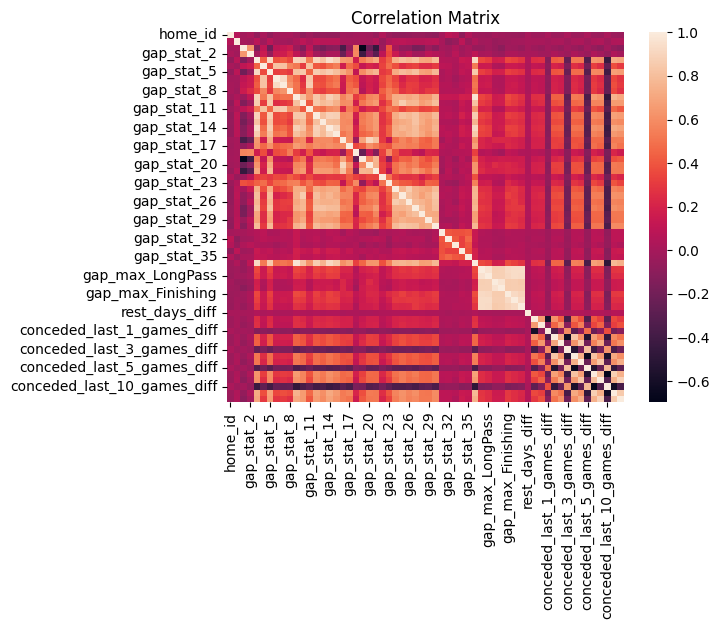

In [107]:
# X = football_data.iloc[:, [34, 35, 42, 48, 53, 55, 62, 64, 74, 80, 82, 87]]
X = football_data.iloc[:, list(range(1, 46)) + list(range(47, 62))]
y = football_data['result']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(X.corr())
ax.set_title("Correlation Matrix")

indices = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(StandardScaler().fit_transform(X), y, indices, test_size=0.2)

## 2D visualization with PCA

In [108]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, '2D visualization using PCA')

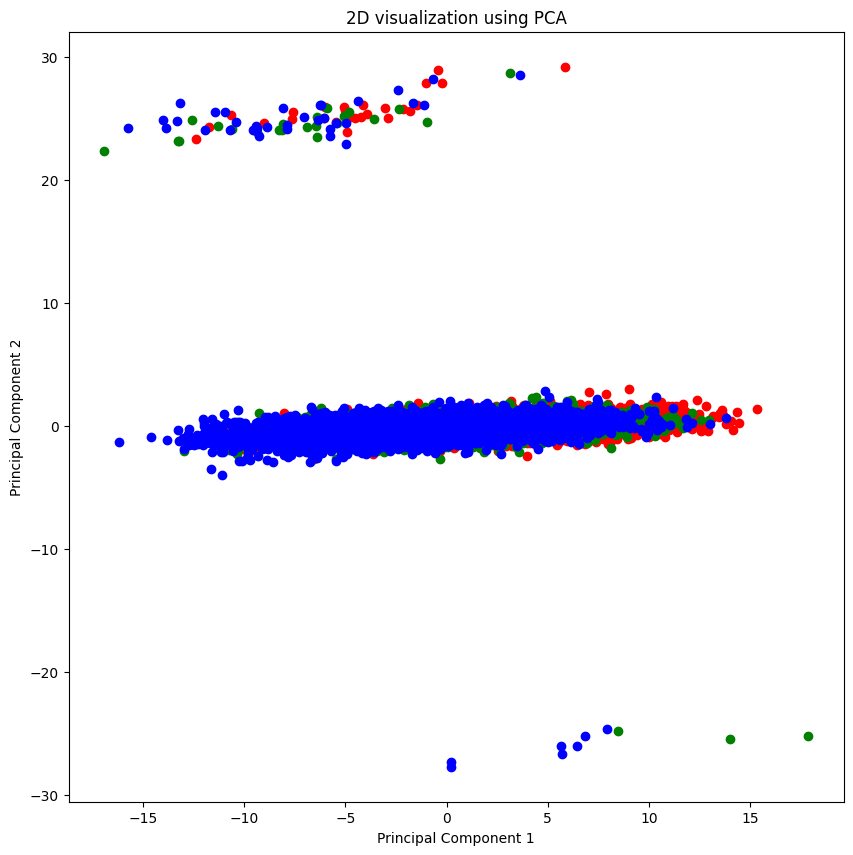

In [109]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)
principalComponentsDf = pd.DataFrame(data=principalComponents, columns=['principalComponents1', 'principalComponents2'])
principalComponentsDf['result'] = y

colors = ['r', 'g', 'b']
labels = ['Home Lose', 'Draw', 'Home Win']

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1,1,1)
for result in [-1, 0, 1]:
  mask = principalComponentsDf['result'] == result
  ax1.scatter(x=principalComponentsDf.loc[mask, 'principalComponents1'],
              y=principalComponentsDf.loc[mask, 'principalComponents2'],
              c=colors[result+1],
              label=result)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('2D visualization using PCA')

## 3D visualization with PCA

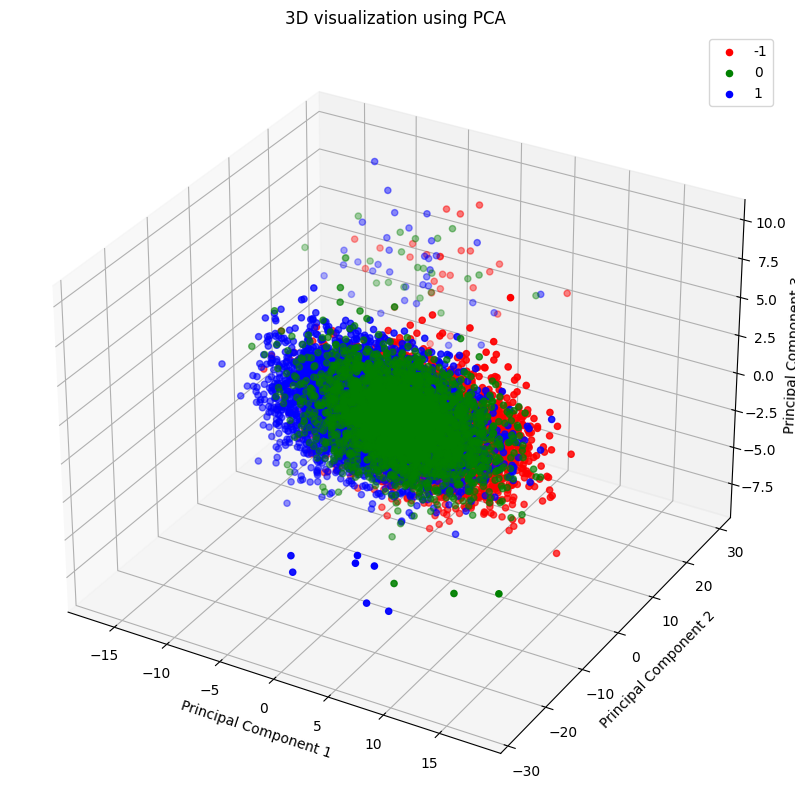

In [110]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X)
principalComponentsDf = pd.DataFrame(data=principalComponents, columns=['principalComponents1', 'principalComponents2', 'principalComponents3'])
principalComponentsDf['result'] = y

colors = ['r', 'g', 'b']
labels = ['Home Lose', 'Draw', 'Home Win']

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1,1,1, projection='3d')
for result, color in zip([-1, 0, 1], colors):
  mask = principalComponentsDf['result'] == result
  ax1.scatter(principalComponentsDf.loc[mask, 'principalComponents1'],
              principalComponentsDf.loc[mask, 'principalComponents2'],
              principalComponentsDf.loc[mask, 'principalComponents3'],
              c=color,
              label=result)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('3D visualization using PCA')
plt.legend()
plt.show()


## Reduce to k features with PCA

In [111]:
k = 10

pca_k = PCA(n_components=k)
X_pca = pca_k.fit_transform(X)

X_train_pca = X_pca[idx_train]
# y_train_pca = y[idx_train]
X_test_pca = X_pca[idx_test]
# y_test_pca = y[idx_test]


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

## Without PCA

### Model fitting

In [113]:
lr_model = LogisticRegression(C=1, max_iter=10000, multi_class='multinomial',solver='sag')
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

### Model evaluation

Accuracy: 0.5461303017052908 
 Balanced accuracy score: 0.46949755591730896 
 F1 score: 0.41040107753567684


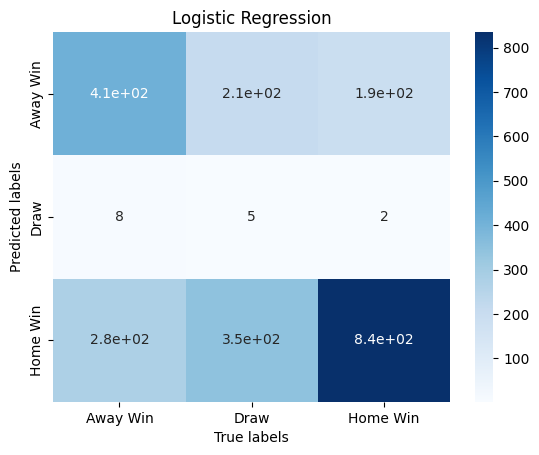

In [114]:
accuracy_lr = accuracy_score(y_hat_lr, y_test)
balanced_accuracy_lr = balanced_accuracy_score(y_hat_lr, y_test)
f1_lr = f1_score(y_hat_lr, y_test, average='macro')
print(f"Accuracy: {accuracy_lr} \n Balanced accuracy score: {balanced_accuracy_lr} \n F1 score: {f1_lr}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_lr, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title('Logistic Regression')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])

### Get the feature importance

In [115]:
# Get the feature importance
feature_importance = abs(lr_model.coef_[0])

# Normalize the feature importance values
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Print the name and importance of each feature
for i in range(feature_importance.shape[0]):
    print(f'Feature {i}: {feature_importance[i]}')

Feature 0: 2.722131042338643
Feature 1: 5.638647547747658
Feature 2: 8.333889490668854
Feature 3: 2.5662066885615977
Feature 4: 1.8404319206241624
Feature 5: 8.075068863688365
Feature 6: 4.256263397627927
Feature 7: 7.370826395682291
Feature 8: 18.427525103298382
Feature 9: 5.5919139241018705
Feature 10: 1.316761740229649
Feature 11: 17.310437601343924
Feature 12: 4.971052277322193
Feature 13: 11.95540650019679
Feature 14: 2.8683011173745143
Feature 15: 1.2162848123918368
Feature 16: 2.8071558229448934
Feature 17: 3.842831236349268
Feature 18: 19.364053139723087
Feature 19: 4.393150214037895
Feature 20: 12.347582066403112
Feature 21: 18.84140983221707
Feature 22: 13.45370314878248
Feature 23: 8.124010119671672
Feature 24: 4.101616812057578
Feature 25: 9.934269526874695
Feature 26: 11.172200421040369
Feature 27: 10.476144367971388
Feature 28: 15.616444041993525
Feature 29: 6.205604105863352
Feature 30: 2.1956545040471678
Feature 31: 12.234519327796015
Feature 32: 1.893800893297036
Featu

## With PCA

### Model Fitting

In [116]:
lr_pca_model = LogisticRegression(C=1, max_iter=10000, multi_class='multinomial',solver='sag')
lr_pca_model.fit(X_train_pca, y_train)
y_hat_lr_pca = lr_pca_model.predict(X_test_pca)

### Model Evaluation

Accuracy: 0.5470048097944906 
 Balanced accuracy score: 0.5385880880177267 
 F1 score: 0.40588695844845546


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


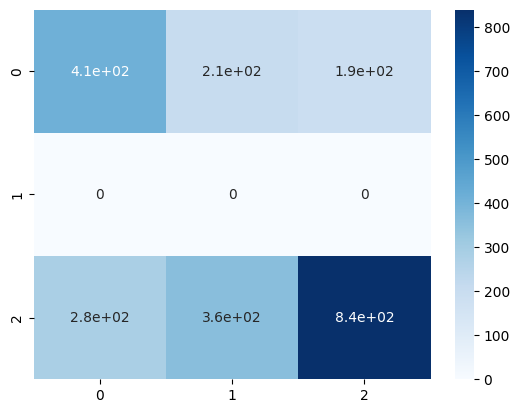

In [117]:
accuracy_lr = accuracy_score(y_hat_lr_pca, y_test)
balanced_accuracy_lr = balanced_accuracy_score(y_hat_lr_pca, y_test)
f1_lr = f1_score(y_hat_lr_pca, y_test, average='macro')
print(f"Accuracy: {accuracy_lr} \n Balanced accuracy score: {balanced_accuracy_lr} \n F1 score: {f1_lr}")

fig1 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_lr_pca, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title(f'Logistic Regression (Reduced to {k} dimension)')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])


## With RFE

In [118]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(multi_class='multinomial',solver='sag')
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(X, y)

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [119]:
lr_rfe_model = LogisticRegression(C=1, max_iter=10000, multi_class='multinomial',solver='sag')
lr_rfe_model.fit(X_train_rfe, y_train)
y_hat_lr_rfe = lr_rfe_model.predict(X_test_rfe)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.545255793616091 
 Balanced accuracy score: 0.5359918281663372 
 F1 score: 0.4048851922429589


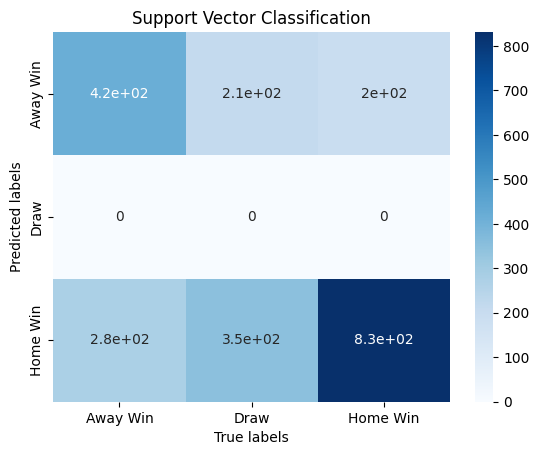

In [120]:
accuracy_lr_rfe = accuracy_score(y_hat_lr_rfe, y_test)
balanced_accuracy_lr_rfe = balanced_accuracy_score(y_hat_lr_rfe, y_test)
f1_lr_rfe = f1_score(y_hat_lr_rfe, y_test, average='macro')
print(f"Accuracy: {accuracy_lr_rfe} \n Balanced accuracy score: {balanced_accuracy_lr_rfe} \n F1 score: {f1_lr_rfe}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_lr_rfe, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title('Support Vector Classification')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])


# Support Vector Classfication

In [121]:
from sklearn.svm import SVC

## Without PCA

### Model fitting

In [122]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
y_hat_svc = svc_model.predict(X_test)

### Model Evaluation

Accuracy: 0.5413205072146917 
 Balanced accuracy score: 0.4522205432074755 
 F1 score: 0.4022169335726467


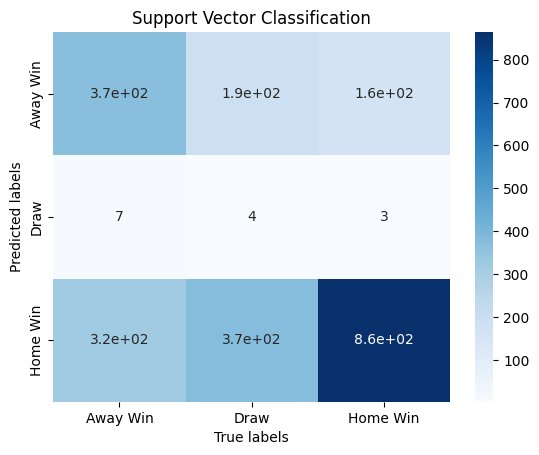

In [123]:
accuracy_svc = accuracy_score(y_hat_svc, y_test)
balanced_accuracy_svc = balanced_accuracy_score(y_hat_svc, y_test)
f1_svc = f1_score(y_hat_svc, y_test, average='macro')
print(f"Accuracy: {accuracy_svc} \n Balanced accuracy score: {balanced_accuracy_svc} \n F1 score: {f1_svc}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_svc, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title('Support Vector Classification')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])


In [124]:
# # Get the feature importance
# feature_importance = abs(svc_model.coef_[0])

# # Normalize the feature importance values
# feature_importance = 100.0 * (feature_importance / feature_importance.max())

# # Print the name and importance of each feature
# for i in range(feature_importance.shape[0]):
#     print(f'Feature {i}: {feature_importance[i]}')

## With PCA

### Model Fitting

In [125]:
svc_pca_model = SVC(kernel='rbf')
svc_pca_model.fit(X_train_pca, y_train)
y_hat_svc_pca = svc_pca_model.predict(X_test_pca)

### Model Evaluation

Accuracy: 0.5435067774376913 
 Balanced accuracy score: 0.3587425941340645 
 F1 score: 0.3997781660024386


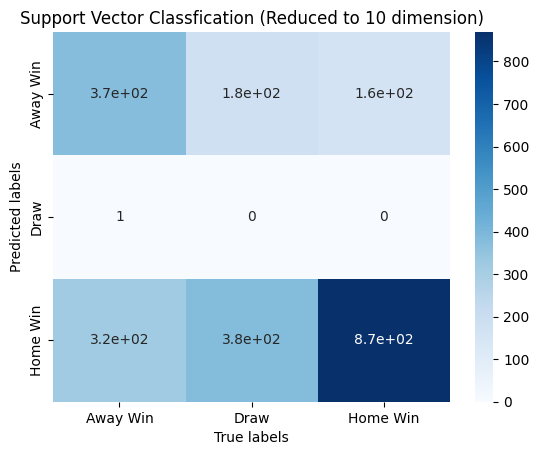

In [126]:
accuracy_svc = accuracy_score(y_hat_svc_pca, y_test)
balanced_accuracy_svc = balanced_accuracy_score(y_hat_svc_pca, y_test)
f1_svc = f1_score(y_hat_svc_pca, y_test, average='macro')
print(f"Accuracy: {accuracy_svc} \n Balanced accuracy score: {balanced_accuracy_svc} \n F1 score: {f1_svc}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_svc_pca, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title(f'Support Vector Classfication (Reduced to {k} dimension)')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])

## With RFE

# Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 1)
rf_model.fit(X_train,y_train)
y_hat_rf = rf_model.predict(X_test)

Accuracy: 0.5439440314822912 
 Balanced accuracy score: 0.46193947230382487 
 F1 score: 0.4259502256734726


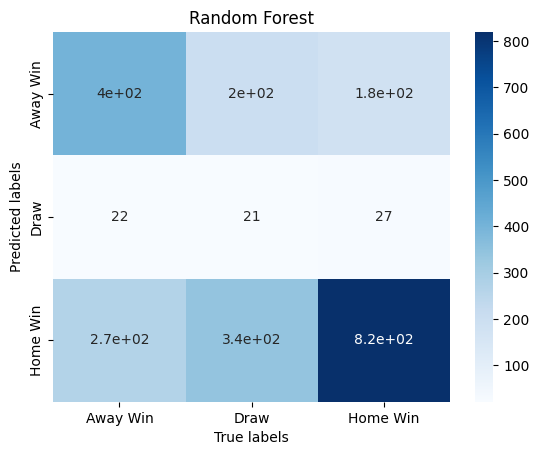

In [129]:
accuracy_rf = accuracy_score(y_hat_rf, y_test)
balanced_accuracy_rf = balanced_accuracy_score(y_hat_rf, y_test)
f1_rf = f1_score(y_hat_rf, y_test, average='macro')
print(f"Accuracy: {accuracy_rf} \n Balanced accuracy score: {balanced_accuracy_rf} \n F1 score: {f1_rf}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_rf, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title(f'Random Forest')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])

# Naive Bayes

## Without PCA

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
y_hat_gnb = gnb_model.predict(X_test)

Accuracy: 0.5085264538696983 
 Balanced accuracy score: 0.47345418990270655 
 F1 score: 0.47440459111211064


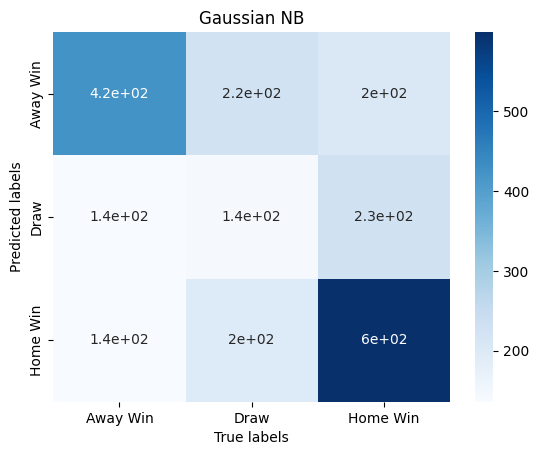

In [132]:
accuracy_gnb = accuracy_score(y_hat_gnb, y_test)
balanced_accuracy_gnb = balanced_accuracy_score(y_hat_gnb, y_test)
f1_gnb = f1_score(y_hat_gnb, y_test, average='macro')
print(f"Accuracy: {accuracy_gnb} \n Balanced accuracy score: {balanced_accuracy_gnb} \n F1 score: {f1_gnb}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_gnb, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title(f'Gaussian NB')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])

## With PCA

Accuracy: 0.5443812855268911 
 Balanced accuracy score: 0.4618463533136869 
 F1 score: 0.5443812855268911


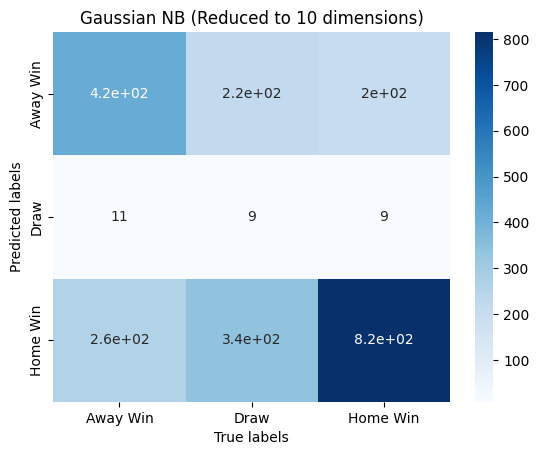

In [139]:
gnb_pca_model = GaussianNB(priors=[0.31, 0.25, 0.44])
gnb_pca_model.fit(X_train_pca,y_train)
y_hat_gnb_pca = gnb_pca_model.predict(X_test_pca)

accuracy_gnb_pca = accuracy_score(y_hat_gnb_pca, y_test)
balanced_accuracy_gnb_pca = balanced_accuracy_score(y_hat_gnb_pca, y_test)
f1_gnb_pca = f1_score(y_hat_gnb_pca, y_test, average='micro')
print(f"Accuracy: {accuracy_gnb_pca} \n Balanced accuracy score: {balanced_accuracy_gnb_pca} \n F1 score: {f1_gnb_pca}")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(confusion_matrix(y_hat_gnb_pca, y_test), cmap='Blues', annot=True)
ax1.set_xlabel('True labels')
ax1.set_ylabel('Predicted labels')
ax1.set_title(f'Gaussian NB (Reduced to {k} dimensions)')
ax1.set_xticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])
ax1.set_yticks([0.5, 1.5, 2.5], ['Away Win', 'Draw', 'Home Win'])

# K-nn

# FINAL MODEL

In [134]:
import pickle

from google.colab import drive
drive.mount('/content/drive')

final_model = GaussianNB(priors=[0.30, 0.25, 0.45])
final_model.fit(X_pca, y)


filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

filename = 'pca_transformer.pkl'
pickle.dump(pca_k, open(filename, 'wb'))


MessageError: ignored

In [ ]:
y_hat_final = final_model.predict(pca_k.transform(X_test))
accuracy = accuracy_score(y_hat_final, y_test)
accuracy